In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn 
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale

import sklearn.metrics as sm
from sklearn import datasets
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns
from sklearn.decomposition import PCA

#  Introdução
<text> Tentamos identificar além das principais features, quais clusters foram responsáveis por mais empresas falidas </text>

In [2]:
df = pd.read_csv('taiwan_data.csv')

#separando o dataframe de testes e o de treinamento
X = df.loc[:, df.columns != 'Bankrupt']
y =  df['Bankrupt']
X.head()

,Cost of Interest-bearing Debt,Cash Reinvestment Ratio,Current Ratio,Acid Test,Interest Expenses/Total Revenue,Total Liability/Equity Ratio.,Liability/Total Assets,Interest-bearing Debt/Equity,Contingent Liability/Equity,Operating Income/Capital,...,CFO to Assets,Cash Flow to Equity,Realized Gross Profit Growth Rate,Operating Income Growth,Net Income Growth,Continuing Operating Income after Tax Growth,Net Income-Excluding Disposal Gain or Loss Growth,Total Asset Growth,Total Equity Growth,Return on Total Asset Growth
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


# criando o modelo e definindo K pelo método do cotovelo

<text> 
    Neste caso, a distância ao quadrado entre centroids e data points deve ser a menor possível.
</text>

In [3]:
K=range(1,30)
wss = []
for k in K:
    kmeans= KMeans(n_clusters=k,init="k-means++",  n_init = 10 ,max_iter=300 )
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

In [4]:
centers = pd.DataFrame({'Clusters' : K, 'WSS' : wss})

<AxesSubplot:xlabel='Clusters', ylabel='WSS'>

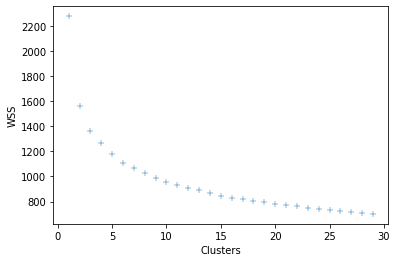

In [5]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = centers, marker="+")

<text>  Dá pra ver que depois de 4 clusters não desce tão rápido, então vamos usar 4, por praticidade também</text>

In [6]:
clustering_kmeans = KMeans(n_clusters=4, random_state=5)
df['clusters'] = clustering_kmeans.fit_predict(X)
df.head()

,Bankrupt,Cost of Interest-bearing Debt,Cash Reinvestment Ratio,Current Ratio,Acid Test,Interest Expenses/Total Revenue,Total Liability/Equity Ratio.,Liability/Total Assets,Interest-bearing Debt/Equity,Contingent Liability/Equity,...,Cash Flow to Equity,Realized Gross Profit Growth Rate,Operating Income Growth,Net Income Growth,Continuing Operating Income after Tax Growth,Net Income-Excluding Disposal Gain or Loss Growth,Total Asset Growth,Total Equity Growth,Return on Total Asset Growth,clusters
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469,0
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794,3
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474,3
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982,0
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490,0


# Resultados, plot das saídas do modelo e análises

<text> Vou usar análise de componentes principais, pelo menos para ver o que acontece com os dados. </text>

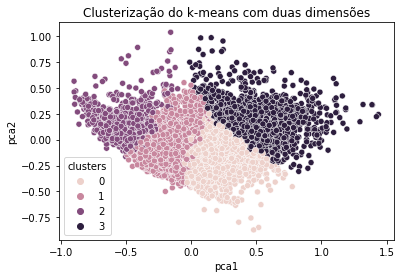

In [7]:
### Run PCA on the data and reduce the dimensions in pca_num_components dimensions
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sns.scatterplot(x="pca1", y="pca2", hue=df['clusters'], data=results)
plt.title('Clusterização do k-means com duas dimensões')
plt.show()

<AxesSubplot:xlabel=' Cash Reinvestment Ratio', ylabel=' Net Income Growth'>

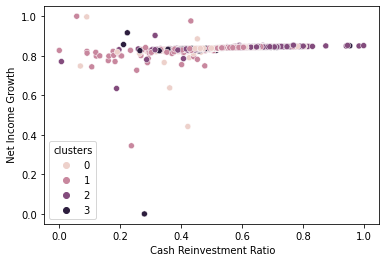

In [17]:
sns.scatterplot(y=' Net Income Growth', x=' Cash Reinvestment Ratio',hue = 'clusters',  data=df)

<AxesSubplot:xlabel=' Gross Profit /Net Sales', ylabel=' Net Income Growth'>

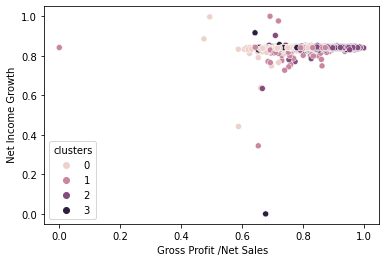

In [18]:
sns.scatterplot(y=' Net Income Growth', x= ' Gross Profit /Net Sales',hue = 'clusters',  data=df)

<BarContainer object of 2 artists>

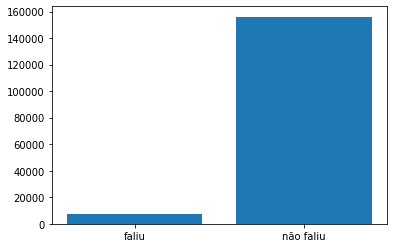

In [11]:
#bar chart do cluster 0

cluster0 = df.loc[df['clusters'] == 0]
bankrupt = cluster0.loc[cluster0['Bankrupt'] == 1].size
noBankrupt =  cluster0.loc[cluster0['Bankrupt'] == 0].size
status = ['faliu', 'não faliu']
empresas = [bankrupt, noBankrupt]
plt.bar(status, empresas)

<BarContainer object of 2 artists>

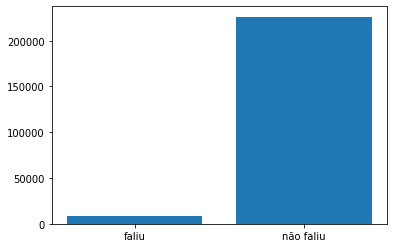

In [12]:
#bar chart do cluster 1


cluster1 = df.loc[df['clusters'] == 1]
bankrupt = cluster1.loc[cluster1['Bankrupt'] == 1].size
noBankrupt =  cluster1.loc[cluster1['Bankrupt'] == 0].size
status = ['faliu', 'não faliu']
empresas = [bankrupt, noBankrupt]
plt.bar(status, empresas)

<BarContainer object of 2 artists>

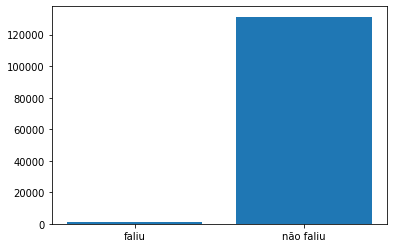

In [13]:
#bar chart do cluster 2

cluster2 = df.loc[df['clusters'] == 2]
bankrupt = cluster2.loc[cluster2['Bankrupt'] == 1].size
noBankrupt =  cluster2.loc[cluster2['Bankrupt'] == 0].size
status = ['faliu', 'não faliu']
empresas = [bankrupt, noBankrupt]

plt.bar(status, empresas)

<BarContainer object of 2 artists>

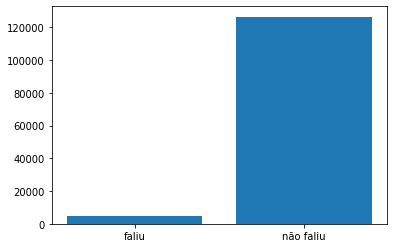

In [14]:
#bar chart do cluster 3

cluster3 = df.loc[df['clusters'] == 3]
bankrupt = cluster3.loc[cluster3['Bankrupt'] == 1].size
noBankrupt =  cluster3.loc[cluster3['Bankrupt'] == 0].size
status = ['faliu', 'não faliu']
empresas = [bankrupt, noBankrupt]
plt.bar(status, empresas)

# sobre os bar charts

<text> podemos ver que pelos clusters criados, o que menos teve falências foi o cluster 2, enquanto que mais teve falências foi o 0. </text>